In [8]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Import dataset

df = pd.read_csv(r'C:\Users\Lenovo\Downloads\Call Center Data.csv')

In [19]:
df.head()

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%


In [91]:
df.columns

Index(['Index', 'Incoming Calls', 'Answered Calls', 'Answer Rate',
       'Abandoned Calls', 'Answer Speed (AVG)', 'Talk Duration (AVG)',
       'Waiting Time (AVG)', 'Service Level (20 Seconds)'],
      dtype='object')

In [92]:
df.shape

(1251, 9)

In [93]:
df.info

<bound method DataFrame.info of       Index  Incoming Calls  Answered Calls Answer Rate  Abandoned Calls  \
0         1             217             204      94.01%               13   
1         2             200             182      91.00%               18   
2         3             216             198      91.67%               18   
3         4             155             145      93.55%               10   
4         5              37              37     100.00%                0   
...     ...             ...             ...         ...              ...   
1246   1247             191             184      96.34%                7   
1247   1248             212             209      98.58%                3   
1248   1249             210             203      96.67%                7   
1249   1250             167             159      95.21%                8   
1250   1251              12              11      91.67%                1   

     Answer Speed (AVG) Talk Duration (AVG) Waiting Tim

In [4]:
df.nunique()

Index                         1251
Incoming Calls                 403
Answered Calls                 363
Answer Rate                    730
Abandoned Calls                115
Answer Speed (AVG)              93
Talk Duration (AVG)            131
Waiting Time (AVG)             424
Service Level (20 Seconds)    1027
dtype: int64

In [5]:
df.isnull().sum()

Index                         0
Incoming Calls                0
Answered Calls                0
Answer Rate                   0
Abandoned Calls               0
Answer Speed (AVG)            0
Talk Duration (AVG)           0
Waiting Time (AVG)            0
Service Level (20 Seconds)    0
dtype: int64

In [94]:
# Checking the statistical information in the data
df.describe().style.background_gradient(cmap='YlOrRd')

,Index,Incoming Calls,Answered Calls,Abandoned Calls
count,1251.000000,1251.000000,1251.000000,1251.000000
mean,626.000000,198.539568,176.845723,21.693845
std,361.276902,156.534195,115.612080,59.671955
min,1.000000,5.000000,5.000000,0.000000
25%,313.500000,123.000000,114.000000,3.000000
50%,626.000000,177.000000,166.000000,8.000000
75%,938.500000,233.000000,214.500000,16.000000
max,1251.000000,1575.000000,909.000000,704.000000


In [95]:
df.dtypes

Index                          int64
Incoming Calls                 int64
Answered Calls                 int64
Answer Rate                   object
Abandoned Calls                int64
Answer Speed (AVG)            object
Talk Duration (AVG)           object
Waiting Time (AVG)            object
Service Level (20 Seconds)    object
dtype: object

In [96]:
#Maximum number of answered calls
df['Answered Calls'].max()

909

In [97]:
#Least number of answered calls
df['Answered Calls'].min()

5

In [98]:
# Check total number of null values
df.isnull().sum()

Index                         0
Incoming Calls                0
Answered Calls                0
Answer Rate                   0
Abandoned Calls               0
Answer Speed (AVG)            0
Talk Duration (AVG)           0
Waiting Time (AVG)            0
Service Level (20 Seconds)    0
dtype: int64

In [99]:
# Examine rows with missing values in any of the columns

df.loc[callcenter_data.isnull().any(axis=1)]

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)


In [14]:
# Remove any rows where there are missing values

df = df.dropna()

In [15]:
# Checking Duplicate values
Checking_duplicate_values=df.duplicated().sum()
print(f'The data set contains the {Checking_duplicate_values} values')

The data set contains the 0 values


In [16]:
# Check the duplicate rows

df.loc[df.duplicated()]


,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)


In [17]:
df['Answer Speed (AVG)'].value_counts()

0:00:26    47
0:00:21    47
0:00:16    45
0:00:17    44
0:00:13    44
           ..
0:02:01     1
0:01:38     1
0:04:04     1
0:05:08     1
0:01:14     1
Name: Answer Speed (AVG), Length: 93, dtype: int64

### Plot Answer Speed (Avg)

<Axes: >

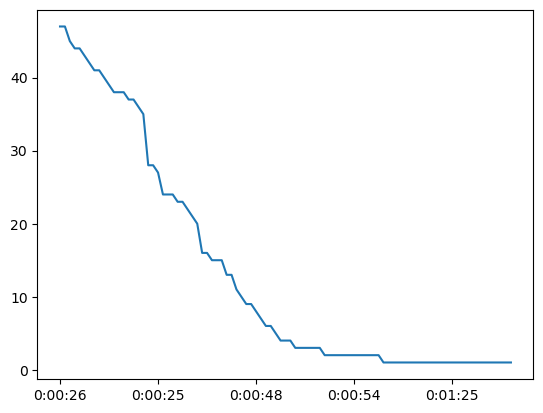

In [18]:
df['Answer Speed (AVG)'].value_counts().plot()

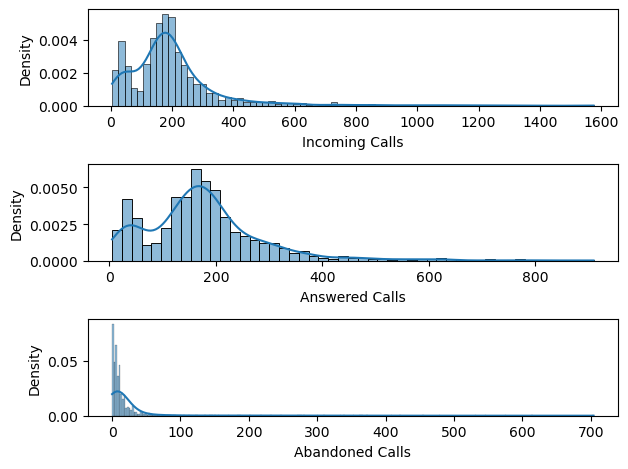

In [4]:
# Select the columns to be plotted
cols = ['Incoming Calls', 'Answered Calls', 'Abandoned Calls']

# create the figure and axes
fig, axes = plt.subplots(3, 1)
axes = axes.ravel()  

for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()

### Histogram Interpretation

 **Incoming Calls:**
  The peak around 100-200 calls suggests that this is the most common range for incoming calls. The gradual decrease towards 1600 calls indicates fewer instances of very high call volumes.

 **Answered Calls:**
  A pronounced peak in the 100-200 call range implies that most calls are answered within this volume. The tapering off at higher numbers suggests that it's less common to have a large volume of answered calls.

 **Abandoned Calls:**
  The steep peak near zero shows that abandoned calls are typically few or none, with a rapid decrease in frequency as the number of abandoned calls increases.


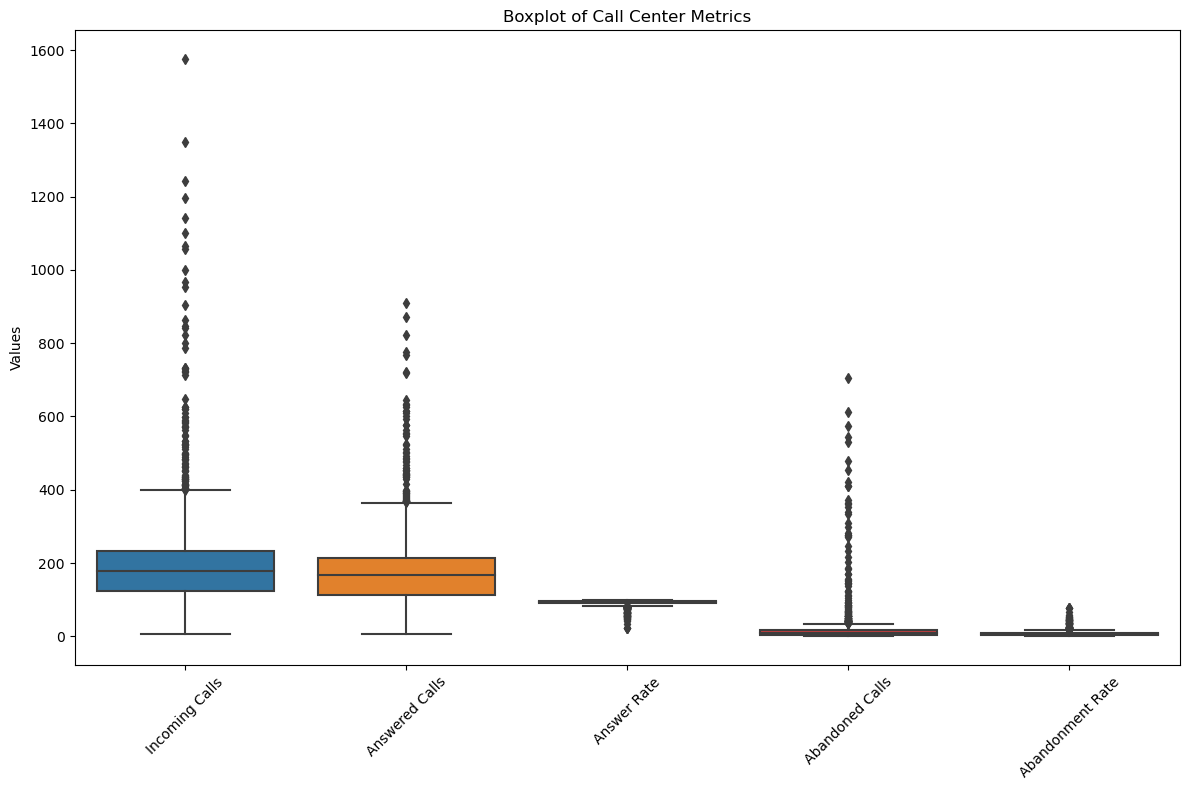

In [5]:
# Remove the 'Index' column
df = df.drop(columns=['Index'])

# Create boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="v")
plt.title("Boxplot of Call Center Metrics")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Boxplot Interpretation

 **Incoming Calls & Answered Calls:**
  - These metrics have a higher median and a wider interquartile range (IQR), indicating a larger spread and higher variability in the data. The presence of outliers suggests there are instances with unusually high or low call volumes.

 **Abandoned Calls:**
  - This metric shows a moderate range within its IQR and fewer outliers, which could mean that the number of abandoned calls is relatively stable with some exceptions.

 **Average Speed of Answer:**
  - The low median and IQR suggest that calls are typically answered quickly, but the presence of extreme outliers indicates that there can be significant delays in some cases.

 **Average Handle Time:**
  - Similar to the Average Speed of Answer, this metric has a low median and IQR, implying efficient handling of calls. However, the extreme outliers suggest that some calls take much longer to handle.

In [6]:
sns.set_style('darkgrid')

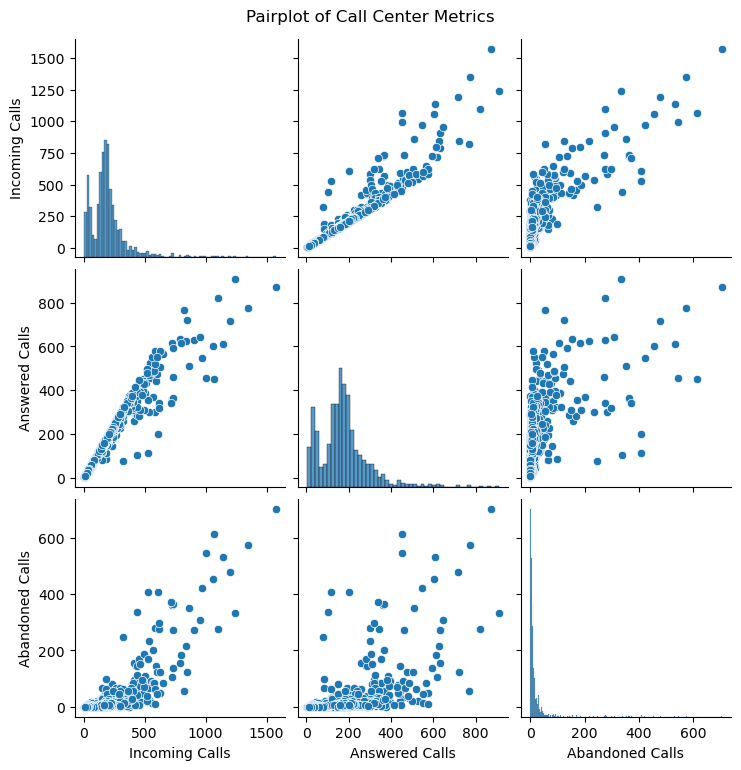

In [8]:
# Load the dataset
df = pd.read_csv("Call Center Data.csv")

# Remove the 'Index' column
df = df.drop(columns=['Index'])

# Create pairplot
sns.pairplot(df)
plt.suptitle("Pairplot of Call Center Metrics", y=1.02)
plt.show()


### Insights

- **Positive Correlation**: There's a positive correlation between 'Incoming Calls' and 'Answered Calls', indicating that as the number of incoming calls increases, the number of answered calls also tends to increase.
- **Call Distribution**: The histograms show most call counts are clustered towards the lower end, suggesting that higher call volumes are less frequent.
- **Abandoned Calls**: There is also a positive correlation between 'Incoming Calls' and 'Abandoned Calls,' as well as between 'Answered Calls' and 'Abandoned Calls', which could indicate that higher volumes of incoming calls may lead to more abandoned calls if not managed efficiently.
- **Performance Improvement**: These correlations can help in analyzing call center performance and identifying areas for improvement, such as optimizing call handling capacity to reduce abandoned calls. 

These insights can guide strategies to enhance customer service and operational efficiency.

## Z-score method

In [10]:
from scipy import stats

# Calculate Z-scores for 'Answered Calls'
z_scores = stats.zscore(df['Answered Calls'])

# Filter out outliers with a Z-score greater than 3 or less than -3
df_cleaned = df[(z_scores < 3) & (z_scores > -3)]


In [11]:
# Check rows with a z-score over 3

df[(z_scores > 3)]

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
185,186,547,526,96.16%,21,0:00:19,0:01:21,0:03:54,81.58%
240,241,822,767,93.31%,55,0:00:24,0:01:25,0:04:35,64.40%
351,352,721,616,85.44%,105,0:00:57,0:01:55,0:05:48,28.31%
836,837,1057,602,56.95%,455,0:01:44,0:02:33,0:12:24,11.49%
838,839,1575,871,55.30%,704,0:01:32,0:02:33,0:22:45,13.93%
839,840,1349,775,57.45%,574,0:01:46,0:03:10,0:15:53,12.16%
841,842,968,547,56.51%,421,0:02:26,0:03:18,0:14:13,11.71%
843,844,788,633,80.33%,155,0:01:13,0:03:23,0:12:26,20.88%
845,846,842,625,74.23%,217,0:01:11,0:03:10,0:14:28,26.93%
846,847,847,722,85.24%,125,0:00:54,0:03:04,0:08:05,33.49%


In [12]:
df = df[['Incoming Calls', 'Answered Calls', 'Abandoned Calls', 'Answer Speed (AVG)', 'Talk Duration (AVG)', 'Waiting Time (AVG)']]
df.head()

,Incoming Calls,Answered Calls,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG)
0,217,204,13,0:00:17,0:02:14,0:02:45
1,200,182,18,0:00:20,0:02:22,0:06:55
2,216,198,18,0:00:18,0:02:38,0:03:50
3,155,145,10,0:00:15,0:02:29,0:03:12
4,37,37,0,0:00:03,0:02:06,0:00:35


In [41]:
corr = df.corr()
corr

,Incoming Calls,Answered Calls,Abandoned Calls
Incoming Calls,1.000000,0.940017,0.681865
Answered Calls,0.940017,1.000000,0.391436
Abandoned Calls,0.681865,0.391436,1.000000


<Axes: >

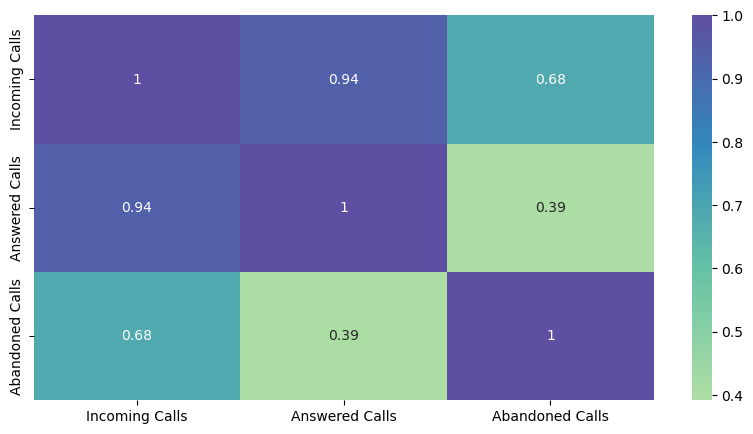

In [66]:
plt.figure(figsize=(10, 5))
sns.heatmap(data = corr, annot=True, cmap="Spectral", center=0)

### Heatmap Interpretation

**Incoming Calls vs. Answered Calls:**
- The correlation between these two categories is likely to be strong, as more incoming calls would generally lead to more answered calls, assuming the call center has the capacity to handle them.

**Incoming Calls vs. Abandoned Calls:**
- This correlation demonstrate a moderate to strong correlation here. A high volume of incoming calls could lead to more abandoned calls if callers are waiting too long or if the call center is overwhelmed.

**Answered Calls vs. Abandoned Calls:**
- This correlation demonstrate negative correlation; as the number of answered calls increases, the number of abandoned calls might decrease, indicating good call center efficiency.


 Recommendations:

- **Optimize Staffing**: Adjust staffing levels to match the peak times for **Incoming Calls** and **Answered Calls** to minimize **Abandoned Calls**.
- **Improve Response Time**: Aim to reduce the **Answer Speed (AVG)**, particularly during high traffic periods, to enhance customer satisfaction.
- **Enhance Service Level**: Focus on maintaining a high **Service Level (20 Seconds)** by ensuring calls are answered promptly.
- **Data-Driven Decisions**: Utilize the correlation insights from the heatmap to make informed decisions on managing call volumes and improving service efficiency.

  Implementing these recommendations could lead to better resource allocation, improved customer experience, and more efficient call center operations.